In [76]:
import tensorflow as tf
import tensorflow_hub as hub
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
import numpy as np
import os

In [2]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

In [58]:
model = tf.keras.Sequential([
  hub.KerasLayer("https://tfhub.dev/google/imagenet/mobilenet_v3_large_100_224/feature_vector/5",trainable=False)
])

model.build([1, 224, 224, 3])

model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_2 (KerasLayer)  (1, 1280)                 4226432   
                                                                 
Total params: 4,226,432
Trainable params: 0
Non-trainable params: 4,226,432
_________________________________________________________________


In [7]:
def preprocess_image(image_url):
  img_input = tf.io.read_file(image_url)

  # Decodifique a imagem para um tensor de rank 3 [height, width, channels]
  img_input = tf.image.decode_image(img_input)

  # Redimensione a imagem para o tamanho desejado
  img_input = tf.image.resize(img_input, [224, 224])

  # Normalize os valores dos pixels para o intervalo [0, 1]
  img_input = img_input / 255.0

  # Adicione uma dimensão de batch no início
  img_input = tf.expand_dims(img_input, 0)
  return img_input

In [ ]:
image_path = "/tmp/img"

In [79]:
root_classes_img_path = "./class/"

classes_img_path = os.listdir(root_classes_img_path)
classes_img_x = np.empty((1280,),dtype='float32')
classes_img_y = []

fist = True
for index,class_img_path in enumerate(classes_img_path):
    for filename in os.listdir(root_classes_img_path+class_img_path):
        print(class_img_path,f'{root_classes_img_path}{class_img_path}/{filename}')
        predict_img = model.predict(preprocess_image(f'{root_classes_img_path}{class_img_path}/{filename}'))
        print(predict_img[0])
        if fist:
            classes_img_x = predict_img[0]
            classes_img_y = [index]
            fist = False
        else:
            classes_img_x = np.vstack((classes_img_x, predict_img[0]))
            classes_img_y.append(index)


eu ./class/eu/2022-12-31.jpg
1/1 [==============================] - 0s 444ms/step
[-0.05567751  0.0589968  -0.31866843 ... -0.21610011  3.1537938
  0.13900387]
eu ./class/eu/20230129_150057.jpg
1/1 [==============================] - 0s 265ms/step
[-0.29514232 -0.1561633  -0.35665756 ... -0.0557354   0.41251186
 -0.28435996]
guri ./class/guri/20201108_115630.jpg
1/1 [==============================] - 0s 187ms/step
[ 0.0531718  -0.363788   -0.32387495 ... -0.30064893  0.692771
 -0.287549  ]
lixo ./class/lixo/WhatsApp Image 2023-08-31 at 1.55.19 PM.jpeg
1/1 [==============================] - 0s 276ms/step
[ 0.36110985  0.5351675  -0.04295387 ... -0.16581748 -0.16315171
 -0.3548895 ]


In [70]:
num_classes = len(classes_img_path)
num_classes

3

In [84]:
#classes_img_y = np.array(classes_img_y)
my_y = to_categorical(classes_img_y, num_classes=num_classes)
my_y

array([[1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [73]:
classes_img_x

array([[-0.05567751,  0.0589968 , -0.31866843, ..., -0.21610011,
         3.1537938 ,  0.13900387],
       [-0.29514232, -0.1561633 , -0.35665756, ..., -0.0557354 ,
         0.41251186, -0.28435996],
       [ 0.0531718 , -0.363788  , -0.32387495, ..., -0.30064893,
         0.692771  , -0.287549  ],
       [ 0.36110985,  0.5351675 , -0.04295387, ..., -0.16581748,
        -0.16315171, -0.3548895 ]], dtype=float32)

In [74]:
my_model = Sequential([
    Dense(num_classes, activation='softmax', input_shape=(1280,)),
    #Dense(num_classes, activation='softmax'),
])

my_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

my_model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 3)                 3843      
                                                                 
Total params: 3,843
Trainable params: 3,843
Non-trainable params: 0
_________________________________________________________________


In [87]:
my_model.fit(
    classes_img_x, my_y,
    epochs=200,
    batch_size=1000,
    validation_split=0,
)

loss, accuracy = my_model.evaluate(classes_img_x, my_y)
print(f'Loss: {loss}, Accuracy: {accuracy}')

Epoch 1/200
1/1 [==============================] - 0s 8ms/step - loss: 9.6077e-05 - accuracy: 1.0000
Epoch 2/200
1/1 [==============================] - 0s 12ms/step - loss: 9.5958e-05 - accuracy: 1.0000
Epoch 3/200
1/1 [==============================] - 0s 9ms/step - loss: 9.5750e-05 - accuracy: 1.0000
Epoch 4/200
1/1 [==============================] - 0s 14ms/step - loss: 9.5541e-05 - accuracy: 1.0000
Epoch 5/200
1/1 [==============================] - 0s 11ms/step - loss: 9.5273e-05 - accuracy: 1.0000
Epoch 6/200
1/1 [==============================] - 0s 10ms/step - loss: 9.5124e-05 - accuracy: 1.0000
Epoch 7/200
1/1 [==============================] - 0s 11ms/step - loss: 9.4975e-05 - accuracy: 1.0000
Epoch 8/200
1/1 [==============================] - 0s 11ms/step - loss: 9.4736e-05 - accuracy: 1.0000
Epoch 9/200
1/1 [==============================] - 0s 31ms/step - loss: 9.4528e-05 - accuracy: 1.0000
Epoch 10/200
1/1 [==============================] - 0s 99ms/step - loss: 9.4349e-05 

Acurácia: 0.5


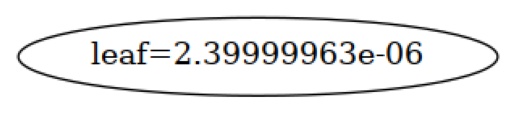

In [88]:
# Treinar o modelo
dtrain = xgb.DMatrix(classes_img_x, label=classes_img_y)

bst = xgb.train({
    'max_depth': 512,  # profundidade máxima de cada árvore
    'eta': 0.00001,    # taxa de aprendizagem
    'objective': 'multi:softmax',  # objetivo da aprendizagem
    'num_class': len(classes_img_path) # número de classes
    },
    dtrain, 2000)

preds = bst.predict(dtrain)

# Avaliar a acurácia
accuracy = accuracy_score(classes_img_y, preds)
print(f"Acurácia: {accuracy}")

# Visualizar árvore
xgb.plot_tree(bst)
plt.show()

In [ ]:
file_paths = []  # para armazenar os caminhos completos dos arquivos
file_names = []  # para armazenar apenas os nomes dos arquivos

# caminhando através do diretório raiz e todos os seus subdiretórios
for dirpath, dirnames, filenames in os.walk('./data/', topdown=True):
    for filename in filenames:
        if filename.endswith('.txt'):
            full_path = os.path.join(dirpath, filename)
            file_paths.append(full_path)
            file_names.append(int(filename.split('.')[0]))

file_names = set(file_names)

for index,doc in enumerate(data["seqDocumento"]):
  if doc in file_names:
    process_file((file_paths[index], doc))

In [195]:
predict_img = model.predict(preprocess_image(image_path))
predict_img[0]

1/1 [==============================] - 0s 146ms/step


array([-0.05567751,  0.0589968 , -0.31866843, ..., -0.21610011,
        3.1537938 ,  0.13900387], dtype=float32)

In [199]:
predict_img[0]

array([ 0.0531718 , -0.363788  , -0.32387495, ..., -0.30064893,
        0.692771  , -0.287549  ], dtype=float32)

In [153]:
predicted_class_idx = tf.where(tf.equal(predict_img, predict_img.max()))[0][1].numpy()
predicted_class_idx

531